In [110]:
import tensorflow as tf

In [111]:
print(tf.__version__)

2.12.0


In [112]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')


In [114]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [115]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [116]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [117]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [118]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [119]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [120]:
# Part 2 - Now let's make the ANN!

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [122]:
# Initialising the ANN
classifier = Sequential()

In [123]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [124]:
# Adding the input layer and the Second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [125]:
# Adding the Output  layer
classifier.add(Dense(units=1,activation='relu'))

In [126]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [127]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=25)

Epoch 1/25


C:\Users\ashutosh.sharma\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


536/536 [==============================] - 2s 3ms/step - loss: 1.3516 - accuracy: 0.6738 - val_loss: 1.0525 - val_accuracy: 0.7259
Epoch 2/25
536/536 [==============================] - 2s 3ms/step - loss: 0.9390 - accuracy: 0.7391 - val_loss: 0.8614 - val_accuracy: 0.7187
Epoch 3/25
536/536 [==============================] - 2s 3ms/step - loss: 0.7553 - accuracy: 0.7427 - val_loss: 0.7879 - val_accuracy: 0.7565
Epoch 4/25
536/536 [==============================] - 2s 3ms/step - loss: 0.7180 - accuracy: 0.7692 - val_loss: 0.7423 - val_accuracy: 0.7626
Epoch 5/25
536/536 [==============================] - 2s 3ms/step - loss: 0.6251 - accuracy: 0.7451 - val_loss: 0.6366 - val_accuracy: 0.7531
Epoch 6/25
536/536 [==============================] - 2s 3ms/step - loss: 0.5873 - accuracy: 0.7707 - val_loss: 0.6218 - val_accuracy: 0.7758
Epoch 7/25
536/536 [==============================] - 2s 3ms/step - loss: 0.5458 - accuracy: 0.7750 - val_loss: 0.5430 - val_accuracy: 0.7686
Epoch 8/25
536/53

In [128]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


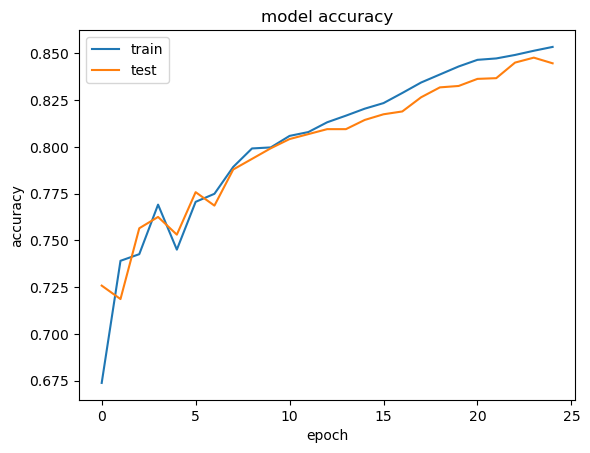

In [129]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

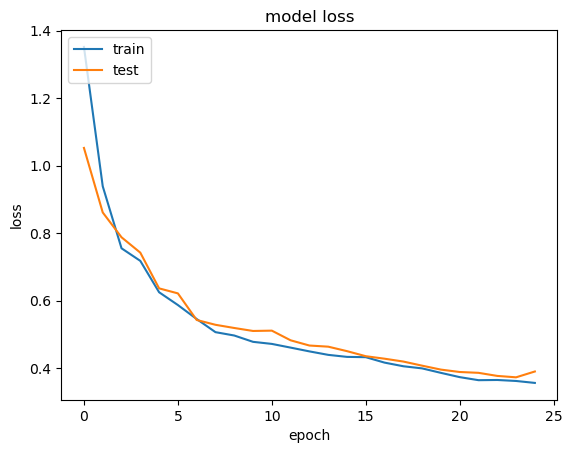

In [130]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [132]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1560,   35],
       [ 237,  168]], dtype=int64)

In [133]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [134]:
score

0.864